In [1]:
# Q1 a) 

In [3]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python
#X = diabetesdata[:,0:8] # input X
#Y = diabetesdata[:,8] # output Y

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the diabetesdata
#model.fit(X, Y, epochs=150, batch_size=10)


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))


# evaluate the keras model
#_, accuracy = model.evaluate(X,Y)

score = model.evaluate(x_test, y_test)

#print('Accuracy on diabetesdata: %.2f' % (accuracy*100))

print('Test loss:', score[0],'Test accuracy:', score[1])


Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 260us/step - loss: 10.8956 - accuracy: 0.3772 - val_loss: 1.6272 - val_accuracy: 0.5000
Epoch 2/150
668/668 [==============================] - 0s 87us/step - loss: 1.2716 - accuracy: 0.6033 - val_loss: 1.2539 - val_accuracy: 0.6000
Epoch 3/150
668/668 [==============================] - 0s 67us/step - loss: 1.0866 - accuracy: 0.6287 - val_loss: 1.0851 - val_accuracy: 0.5800
Epoch 4/150
668/668 [==============================] - 0s 68us/step - loss: 0.9405 - accuracy: 0.6272 - val_loss: 0.9312 - val_accuracy: 0.6000
Epoch 5/150
668/668 [==============================] - 0s 67us/step - loss: 0.8175 - accuracy: 0.6467 - val_loss: 0.8244 - val_accuracy: 0.6200
Epoch 6/150
668/668 [==============================] - 0s 67us/step - loss: 0.7713 - accuracy: 0.6482 - val_loss: 0.8141 - val_accuracy: 0.5900
Epoch 7/150
668/668 [==============================] - 0s 75us/step - loss: 0.7185 - acc

668/668 [==============================] - 0s 68us/step - loss: 0.5145 - accuracy: 0.7380 - val_loss: 0.5891 - val_accuracy: 0.7600
Epoch 114/150
668/668 [==============================] - 0s 67us/step - loss: 0.5009 - accuracy: 0.7515 - val_loss: 0.5840 - val_accuracy: 0.7300
Epoch 115/150
668/668 [==============================] - 0s 67us/step - loss: 0.5002 - accuracy: 0.7545 - val_loss: 0.5846 - val_accuracy: 0.7300
Epoch 116/150
668/668 [==============================] - 0s 70us/step - loss: 0.5107 - accuracy: 0.7425 - val_loss: 0.5967 - val_accuracy: 0.6900
Epoch 117/150
668/668 [==============================] - 0s 69us/step - loss: 0.5106 - accuracy: 0.7530 - val_loss: 0.5825 - val_accuracy: 0.7300
Epoch 118/150
668/668 [==============================] - 0s 66us/step - loss: 0.4991 - accuracy: 0.7605 - val_loss: 0.6465 - val_accuracy: 0.6600
Epoch 119/150
668/668 [==============================] - 0s 66us/step - loss: 0.5157 - accuracy: 0.7515 - val_loss: 0.5860 - val_accuracy:

In [4]:
print(diabetesdata)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [5]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [6]:
# Q1 b) 

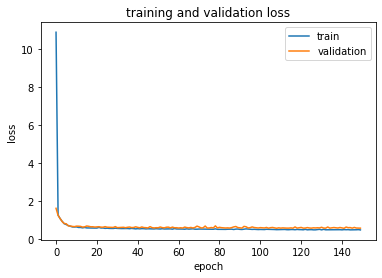

In [7]:
# plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

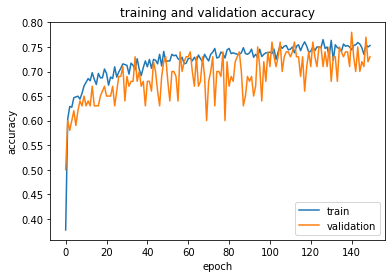

In [8]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
# Q1 c) Use a trained network to generate predictions on new data.

In [10]:
# probability predictions on test data
predictions = model.predict(x_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
# class predictions
predictions = model.predict_classes(x_test)
for i in range(x_test.shape[0]):
    print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.43, 43.0] => 0 (expected 0)
[9.0, 154.0, 78.0, 30.0, 100.0, 30.9, 0.164, 45.0] => 1 (expected 0)
[6.0, 165.0, 68.0, 26.0, 168.0, 33.6, 0.631, 49.0] => 1 (expected 0)
[1.0, 99.0, 58.0, 10.0, 0.0, 25.4, 0.551, 21.0] => 0 (expected 0)
[10.0, 68.0, 106.0, 23.0, 49.0, 35.5, 0.285, 47.0] => 0 (expected 0)
[3.0, 123.0, 100.0, 35.0, 240.0, 57.3, 0.88, 22.0] => 0 (expected 0)
[8.0, 91.0, 82.0, 0.0, 0.0, 35.6, 0.587, 68.0] => 0 (expected 0)
[6.0, 195.0, 70.0, 0.0, 0.0, 30.9, 0.328, 31.0] => 1 (expected 1)
[9.0, 156.0, 86.0, 0.0, 0.0, 24.8, 0.23, 53.0] => 0 (expected 1)
[0.0, 93.0, 60.0, 0.0, 0.0, 35.3, 0.263, 25.0] => 0 (expected 0)
[3.0, 121.0, 52.0, 0.0, 0.0, 36.0, 0.127, 25.0] => 0 (expected 1)
[2.0, 101.0, 58.0, 17.0, 265.0, 24.2, 0.614, 23.0] => 0 (expected 0)
[2.0, 56.0, 56.0, 28.0, 45.0, 24.2, 0.332, 22.0] => 0 (expected 0)
[0.0, 162.0, 76.0, 36.0, 0.0, 49.6, 0.364, 26.0] => 1 (expected 1)
[0.0, 95.0, 64.0, 39.0, 105.0, 44.6, 0.366, 22.0] => 0 (expec

In [11]:
# Q1 d) 

In [12]:
#Increasing the number of hidden layers

In [13]:

diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))



score = model.evaluate(x_test, y_test)


print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 378us/step - loss: 4.0161 - accuracy: 0.5165 - val_loss: 1.4302 - val_accuracy: 0.4900
Epoch 2/150
668/668 [==============================] - 0s 106us/step - loss: 1.1816 - accuracy: 0.5374 - val_loss: 0.9458 - val_accuracy: 0.5200
Epoch 3/150
668/668 [==============================] - 0s 97us/step - loss: 0.8823 - accuracy: 0.5404 - val_loss: 0.7940 - val_accuracy: 0.5700
Epoch 4/150
668/668 [==============================] - 0s 99us/step - loss: 0.7599 - accuracy: 0.5808 - val_loss: 0.7830 - val_accuracy: 0.4400
Epoch 5/150
668/668 [==============================] - 0s 99us/step - loss: 0.7249 - accuracy: 0.5973 - val_loss: 0.8327 - val_accuracy: 0.6400
Epoch 6/150
668/668 [==============================] - 0s 93us/step - loss: 0.6967 - accuracy: 0.6407 - val_loss: 0.6711 - val_accuracy: 0.6000
Epoch 7/150
668/668 [==============================] - 0s 88us/step - loss: 0.6724 - acc

668/668 [==============================] - 0s 114us/step - loss: 0.4747 - accuracy: 0.7710 - val_loss: 0.5793 - val_accuracy: 0.7400
Epoch 114/150
668/668 [==============================] - 0s 114us/step - loss: 0.4942 - accuracy: 0.7680 - val_loss: 0.5728 - val_accuracy: 0.7100
Epoch 115/150
668/668 [==============================] - 0s 117us/step - loss: 0.4768 - accuracy: 0.7710 - val_loss: 0.5428 - val_accuracy: 0.7800
Epoch 116/150
668/668 [==============================] - 0s 133us/step - loss: 0.4787 - accuracy: 0.7740 - val_loss: 0.5359 - val_accuracy: 0.7900
Epoch 117/150
668/668 [==============================] - 0s 139us/step - loss: 0.4657 - accuracy: 0.7725 - val_loss: 0.5477 - val_accuracy: 0.7900
Epoch 118/150
668/668 [==============================] - 0s 135us/step - loss: 0.4745 - accuracy: 0.7665 - val_loss: 0.5676 - val_accuracy: 0.7000
Epoch 119/150
668/668 [==============================] - 0s 137us/step - loss: 0.4664 - accuracy: 0.7695 - val_loss: 0.5714 - val_ac

In [14]:
# the previous test accuracy is 0.7400000095367432, increasing the number of hidden layers we get 
# the test accuracy: 0.7799999713897705, which means with increasing the number of hidden layers, 
# increasing the test accuracy a little bit.

In [15]:
# increasing the number of hidden units

In [16]:
diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 260us/step - loss: 2.4163 - accuracy: 0.5509 - val_loss: 1.2403 - val_accuracy: 0.6000
Epoch 2/150
668/668 [==============================] - 0s 87us/step - loss: 0.9723 - accuracy: 0.5898 - val_loss: 0.8029 - val_accuracy: 0.5700
Epoch 3/150
668/668 [==============================] - 0s 69us/step - loss: 0.7796 - accuracy: 0.6587 - val_loss: 0.8631 - val_accuracy: 0.4900
Epoch 4/150
668/668 [==============================] - 0s 66us/step - loss: 0.7338 - accuracy: 0.6183 - val_loss: 0.6534 - val_accuracy: 0.6700
Epoch 5/150
668/668 [==============================] - 0s 67us/step - loss: 0.6968 - accuracy: 0.6467 - val_loss: 0.6671 - val_accuracy: 0.6700
Epoch 6/150
668/668 [==============================] - 0s 67us/step - loss: 0.6634 - accuracy: 0.6826 - val_loss: 0.6959 - val_accuracy: 0.6000
Epoch 7/150
668/668 [==============================] - 0s 66us/step - loss: 0.6322 - accu

668/668 [==============================] - 0s 68us/step - loss: 0.4763 - accuracy: 0.7754 - val_loss: 0.5957 - val_accuracy: 0.7400
Epoch 114/150
668/668 [==============================] - 0s 69us/step - loss: 0.4774 - accuracy: 0.7814 - val_loss: 0.6198 - val_accuracy: 0.7000
Epoch 115/150
668/668 [==============================] - 0s 67us/step - loss: 0.5111 - accuracy: 0.7635 - val_loss: 0.6068 - val_accuracy: 0.7100
Epoch 116/150
668/668 [==============================] - 0s 68us/step - loss: 0.4883 - accuracy: 0.7635 - val_loss: 0.6292 - val_accuracy: 0.6900
Epoch 117/150
668/668 [==============================] - 0s 69us/step - loss: 0.5155 - accuracy: 0.7605 - val_loss: 0.6094 - val_accuracy: 0.7300
Epoch 118/150
668/668 [==============================] - 0s 64us/step - loss: 0.4836 - accuracy: 0.7515 - val_loss: 0.6215 - val_accuracy: 0.7000
Epoch 119/150
668/668 [==============================] - 0s 66us/step - loss: 0.4798 - accuracy: 0.7680 - val_loss: 0.6132 - val_accuracy:

In [17]:
# get test accuracy: 0.6800000071525574

In [18]:
# increasing the number of hidden units

In [19]:
diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 260us/step - loss: 17.2694 - accuracy: 0.3458 - val_loss: 5.5696 - val_accuracy: 0.3700
Epoch 2/150
668/668 [==============================] - 0s 81us/step - loss: 2.0700 - accuracy: 0.5240 - val_loss: 1.2612 - val_accuracy: 0.5100
Epoch 3/150
668/668 [==============================] - 0s 68us/step - loss: 1.0347 - accuracy: 0.5838 - val_loss: 0.9276 - val_accuracy: 0.5700
Epoch 4/150
668/668 [==============================] - 0s 70us/step - loss: 0.8199 - accuracy: 0.6153 - val_loss: 0.7691 - val_accuracy: 0.5600
Epoch 5/150
668/668 [==============================] - 0s 72us/step - loss: 0.7513 - accuracy: 0.6317 - val_loss: 0.6749 - val_accuracy: 0.6400
Epoch 6/150
668/668 [==============================] - 0s 71us/step - loss: 0.7120 - accuracy: 0.6497 - val_loss: 0.6444 - val_accuracy: 0.6400
Epoch 7/150
668/668 [==============================] - 0s 72us/step - loss: 0.6684 - acc

668/668 [==============================] - 0s 67us/step - loss: 0.4906 - accuracy: 0.7560 - val_loss: 0.5750 - val_accuracy: 0.6900
Epoch 114/150
668/668 [==============================] - 0s 68us/step - loss: 0.4812 - accuracy: 0.7560 - val_loss: 0.5096 - val_accuracy: 0.7300
Epoch 115/150
668/668 [==============================] - 0s 69us/step - loss: 0.4668 - accuracy: 0.7874 - val_loss: 0.5294 - val_accuracy: 0.7500
Epoch 116/150
668/668 [==============================] - 0s 66us/step - loss: 0.4644 - accuracy: 0.7799 - val_loss: 0.5237 - val_accuracy: 0.7200
Epoch 117/150
668/668 [==============================] - 0s 65us/step - loss: 0.4802 - accuracy: 0.7605 - val_loss: 0.5760 - val_accuracy: 0.6700
Epoch 118/150
668/668 [==============================] - 0s 62us/step - loss: 0.4804 - accuracy: 0.7695 - val_loss: 0.5074 - val_accuracy: 0.7300
Epoch 119/150
668/668 [==============================] - 0s 68us/step - loss: 0.4891 - accuracy: 0.7769 - val_loss: 0.4913 - val_accuracy:

In [20]:
# get the test accuracy: 0.6499999761581421

In [21]:
# therefore, increasing the number of hidden units, the test accuracy is decreasing.

In [22]:
# decreasing the number of hidden units

In [23]:
diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 260us/step - loss: 18.2713 - accuracy: 0.6542 - val_loss: 13.1066 - val_accuracy: 0.6300
Epoch 2/150
668/668 [==============================] - 0s 80us/step - loss: 6.2144 - accuracy: 0.6452 - val_loss: 5.0857 - val_accuracy: 0.5300
Epoch 3/150
668/668 [==============================] - 0s 68us/step - loss: 2.5447 - accuracy: 0.5808 - val_loss: 2.2943 - val_accuracy: 0.4500
Epoch 4/150
668/668 [==============================] - 0s 67us/step - loss: 1.4022 - accuracy: 0.5240 - val_loss: 1.4119 - val_accuracy: 0.4400
Epoch 5/150
668/668 [==============================] - 0s 68us/step - loss: 1.0351 - accuracy: 0.4910 - val_loss: 1.0766 - val_accuracy: 0.4100
Epoch 6/150
668/668 [==============================] - 0s 66us/step - loss: 0.8470 - accuracy: 0.4521 - val_loss: 0.9040 - val_accuracy: 0.3900
Epoch 7/150
668/668 [==============================] - 0s 66us/step - loss: 0.7362 - ac

668/668 [==============================] - 0s 68us/step - loss: 0.5522 - accuracy: 0.7126 - val_loss: 0.6809 - val_accuracy: 0.6300
Epoch 114/150
668/668 [==============================] - 0s 67us/step - loss: 0.5503 - accuracy: 0.7036 - val_loss: 0.6874 - val_accuracy: 0.6600
Epoch 115/150
668/668 [==============================] - 0s 66us/step - loss: 0.5501 - accuracy: 0.7111 - val_loss: 0.6902 - val_accuracy: 0.6800
Epoch 116/150
668/668 [==============================] - 0s 67us/step - loss: 0.5490 - accuracy: 0.7186 - val_loss: 0.6882 - val_accuracy: 0.7000
Epoch 117/150
668/668 [==============================] - 0s 67us/step - loss: 0.5505 - accuracy: 0.7216 - val_loss: 0.6884 - val_accuracy: 0.6400
Epoch 118/150
668/668 [==============================] - 0s 65us/step - loss: 0.5502 - accuracy: 0.7156 - val_loss: 0.6939 - val_accuracy: 0.6700
Epoch 119/150
668/668 [==============================] - 0s 67us/step - loss: 0.5500 - accuracy: 0.7171 - val_loss: 0.6924 - val_accuracy:

In [24]:
# when I decreased the number of hidden units, I observed that the test accuracy was also decreased.

In [25]:
# continue decreasing the number of hidden units

In [26]:
diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 261us/step - loss: 2.2358 - accuracy: 0.4581 - val_loss: 0.8864 - val_accuracy: 0.4000
Epoch 2/150
668/668 [==============================] - 0s 78us/step - loss: 0.7789 - accuracy: 0.5120 - val_loss: 0.6900 - val_accuracy: 0.6300
Epoch 3/150
668/668 [==============================] - 0s 69us/step - loss: 0.7010 - accuracy: 0.6542 - val_loss: 0.6849 - val_accuracy: 0.6300
Epoch 4/150
668/668 [==============================] - 0s 68us/step - loss: 0.6852 - accuracy: 0.6542 - val_loss: 0.6802 - val_accuracy: 0.6300
Epoch 5/150
668/668 [==============================] - 0s 67us/step - loss: 0.6772 - accuracy: 0.6542 - val_loss: 0.6762 - val_accuracy: 0.6300
Epoch 6/150
668/668 [==============================] - 0s 65us/step - loss: 0.6706 - accuracy: 0.6542 - val_loss: 0.6729 - val_accuracy: 0.6300
Epoch 7/150
668/668 [==============================] - 0s 64us/step - loss: 0.6666 - accu

668/668 [==============================] - 0s 65us/step - loss: 0.6448 - accuracy: 0.6542 - val_loss: 0.6602 - val_accuracy: 0.6300
Epoch 114/150
668/668 [==============================] - 0s 71us/step - loss: 0.6449 - accuracy: 0.6542 - val_loss: 0.6602 - val_accuracy: 0.6300
Epoch 115/150
668/668 [==============================] - 0s 67us/step - loss: 0.6449 - accuracy: 0.6542 - val_loss: 0.6603 - val_accuracy: 0.6300
Epoch 116/150
668/668 [==============================] - 0s 68us/step - loss: 0.6448 - accuracy: 0.6542 - val_loss: 0.6602 - val_accuracy: 0.6300
Epoch 117/150
668/668 [==============================] - 0s 67us/step - loss: 0.6448 - accuracy: 0.6542 - val_loss: 0.6603 - val_accuracy: 0.6300
Epoch 118/150
668/668 [==============================] - 0s 69us/step - loss: 0.6449 - accuracy: 0.6542 - val_loss: 0.6602 - val_accuracy: 0.6300
Epoch 119/150
668/668 [==============================] - 0s 71us/step - loss: 0.6448 - accuracy: 0.6542 - val_loss: 0.6602 - val_accuracy:

In [27]:
# increasing more number of hiiden units

In [28]:
diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 264us/step - loss: 1.0460 - accuracy: 0.5943 - val_loss: 0.7756 - val_accuracy: 0.5400
Epoch 2/150
668/668 [==============================] - 0s 82us/step - loss: 0.7076 - accuracy: 0.6407 - val_loss: 0.8321 - val_accuracy: 0.6200
Epoch 3/150
668/668 [==============================] - 0s 68us/step - loss: 0.6578 - accuracy: 0.6781 - val_loss: 0.8892 - val_accuracy: 0.5200
Epoch 4/150
668/668 [==============================] - 0s 70us/step - loss: 0.6651 - accuracy: 0.7081 - val_loss: 0.6938 - val_accuracy: 0.6500
Epoch 5/150
668/668 [==============================] - 0s 70us/step - loss: 0.7481 - accuracy: 0.6662 - val_loss: 1.2600 - val_accuracy: 0.5100
Epoch 6/150
668/668 [==============================] - 0s 69us/step - loss: 0.6687 - accuracy: 0.6527 - val_loss: 0.6613 - val_accuracy: 0.7100
Epoch 7/150
668/668 [==============================] - 0s 71us/step - loss: 0.6849 - accu

668/668 [==============================] - 0s 68us/step - loss: 0.4572 - accuracy: 0.7919 - val_loss: 0.7553 - val_accuracy: 0.6800
Epoch 114/150
668/668 [==============================] - 0s 66us/step - loss: 0.4465 - accuracy: 0.7979 - val_loss: 0.7194 - val_accuracy: 0.6800
Epoch 115/150
668/668 [==============================] - 0s 66us/step - loss: 0.4666 - accuracy: 0.7949 - val_loss: 0.6779 - val_accuracy: 0.7200
Epoch 116/150
668/668 [==============================] - 0s 69us/step - loss: 0.4316 - accuracy: 0.8099 - val_loss: 0.7604 - val_accuracy: 0.7100
Epoch 117/150
668/668 [==============================] - 0s 67us/step - loss: 0.4619 - accuracy: 0.7874 - val_loss: 0.7379 - val_accuracy: 0.6900
Epoch 118/150
668/668 [==============================] - 0s 70us/step - loss: 0.4395 - accuracy: 0.7964 - val_loss: 0.7489 - val_accuracy: 0.7500
Epoch 119/150
668/668 [==============================] - 0s 70us/step - loss: 0.4548 - accuracy: 0.7919 - val_loss: 0.6731 - val_accuracy:

In [29]:
# as I increasing the number of hidden units to 100, the test accuracy is still lower as 0.6299999952316284.
# therefore, the number of hidden units does not affect the validation and test accuracy much, the 
# optimal choice of the numner of hidden units for a neural network depends on the dataset that we are trained,
# and how complicated the model is.

In [30]:
# change the loss function to 'hinge' and activation function to 'tanh' and 'softmax', change optimizer to 'Nadam'.

In [31]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

diabetesdata = loadtxt('pima-indians-diabetes.data.csv', delimiter=',') # read the data into python

x_train = diabetesdata[0:668,0:8]
x_test = diabetesdata[668:768,0:8]
y_train = diabetesdata[0:668,8]
y_test = diabetesdata[668:768,8]

# define sequential neural network model using Keras.
model = Sequential()
model.add(Dense(12, input_dim=8,activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='softmax'))

# compile the keras model
model.compile(loss='hinge', optimizer='Nadam', metrics=['accuracy'])

# fit the keras model on the diabetesdata
history=model.fit(x_train, y_train,
            batch_size=10,
            epochs=150,
            validation_data=(x_test, y_test))


# evaluate the keras model
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0],'Test accuracy:', score[1])

Train on 668 samples, validate on 100 samples
Epoch 1/150
668/668 [==============================] - 0s 308us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 2/150
668/668 [==============================] - 0s 92us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 3/150
668/668 [==============================] - 0s 78us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 4/150
668/668 [==============================] - 0s 79us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 5/150
668/668 [==============================] - 0s 83us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 6/150
668/668 [==============================] - 0s 80us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 7/150
668/668 [==============================] - 0s 77us/step - loss: 1.3084 - accu

668/668 [==============================] - 0s 75us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 114/150
668/668 [==============================] - 0s 72us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 115/150
668/668 [==============================] - 0s 74us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 116/150
668/668 [==============================] - 0s 72us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 117/150
668/668 [==============================] - 0s 79us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 118/150
668/668 [==============================] - 0s 73us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy: 0.3700
Epoch 119/150
668/668 [==============================] - 0s 73us/step - loss: 1.3084 - accuracy: 0.3458 - val_loss: 1.2600 - val_accuracy:

In [32]:
# the test accuracy become lower to 0.3700000047683716.
# therefore, different number of hidden layers and hidden units, and different loss functions, activation 
# functions and optimizers may affect the validation and test accuracy of a model, the best way to train and 
# evaluate a neural network model is to make a good choice of the values of the number of 
# hidden layers and hidden units, and choose a good loss functions, activation functions and optimizers accroding
# to the dataset that we trained, and how complicated the model is.

In [ ]:
therefore, different activation functions may affect the validation and test accuracy of a model, 
the best way to train and evaluate a neural network model is to make a good choice of activation functions 
accroding to the dataset that we trained, how complicated the model is and the types of neural network we used.

In [35]:
# Q2 Logistic regression classification

In [36]:
# i) 

In [72]:
import numpy as np
# the positive class: generated by a Gaussian distribution of zero mean and unit standard deviation
posclass = np.random.normal(0, 1, 1000) # 1000 instances
# the negative class: generated by a Gaussian distribution of mean 3 and unit standard deviation
negclass = np.random.normal(3, 1, 1000) # 1000 instances

In [73]:
from numpy import reshape
posclass = posclass.reshape((posclass.shape[0], 1))
positive = np.ones((1000,1))
# positive class with append 1s
positiveclass = np.append(posclass, positive, axis=1)

negclass = negclass.reshape((negclass.shape[0], 1))
negative = np.zeros((1000,1))
# negative class with append 0s
negativeclass = np.append(negclass, negative, axis=1)

dataset = np.concatenate((positiveclass, negativeclass))

In [74]:
x = dataset[:,0]

target = dataset[:,1]
print(x)
print(target)

[-0.27537431  1.21469284  2.43771847 ...  1.65955086  1.80823962
  2.72928534]
[1. 1. 1. ... 0. 0. 0.]


In [40]:
# ii) 

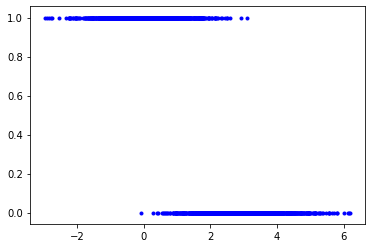

In [75]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x, target, marker='.', color='blue')

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.1)
# reshape data from 1D to 2D
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print(y_test.shape)

(200, 1)


In [78]:
lr.fit(X_train, y_train)

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
lr.predict(X_test)

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

In [80]:
lr.score(X_test, y_test)

0.945

In [81]:
lr.predict_proba(X_test)

array([[8.99558743e-01, 1.00441257e-01],
       [9.72242546e-01, 2.77574537e-02],
       [9.98822210e-01, 1.17779017e-03],
       [1.02551229e-02, 9.89744877e-01],
       [9.32280666e-01, 6.77193344e-02],
       [1.79121567e-03, 9.98208784e-01],
       [1.37240362e-04, 9.99862760e-01],
       [5.26900977e-04, 9.99473099e-01],
       [3.76459658e-02, 9.62354034e-01],
       [9.11970941e-02, 9.08802906e-01],
       [2.05019033e-01, 7.94980967e-01],
       [6.07512622e-03, 9.93924874e-01],
       [9.99590295e-01, 4.09704908e-04],
       [4.65424579e-03, 9.95345754e-01],
       [7.19090868e-01, 2.80909132e-01],
       [3.00871572e-01, 6.99128428e-01],
       [2.15472329e-01, 7.84527671e-01],
       [9.85784543e-01, 1.42154572e-02],
       [9.99057902e-01, 9.42097539e-04],
       [1.54302561e-02, 9.84569744e-01],
       [8.91826734e-01, 1.08173266e-01],
       [1.83438533e-01, 8.16561467e-01],
       [1.34014606e-03, 9.98659854e-01],
       [9.79143310e-01, 2.08566903e-02],
       [6.448408

In [82]:
# store the predicted probabilities for class 0
y_pred_prob_training_neg = lr.predict_proba(X_test)[:,0]


In [83]:
# store the predicted probabilities for class 1
y_pred_prob_training_pos = lr.predict_proba(X_test)[:,1]


In [84]:
lr.predict([[1.9]])

array([0.])

In [85]:
# trained model using best classifier from Hyperparameter Optimization evaluated below

In [86]:

lr = LogisticRegression(penalty='l2', dual=True, C=0.1, solver='liblinear', max_iter=100)

lr.fit(X_train, y_train)



accuracy = lr.score(X_test, y_test)

print('Accuracy on new constructed test set: ', accuracy)



Accuracy on new constructed test set:  0.945


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
# store the predicted probabilities for class 0
y_pred_prob_training_neg_opt = lr.predict_proba(X_test)[:,0]


In [89]:
# store the predicted probabilities for class 1
y_pred_prob_training_pos_opt = lr.predict_proba(X_test)[:,1]


In [55]:
# Hyperparameter Optimization to obtain better performance

In [56]:
# hyperparameter optimization using GridSearchCV

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
dual = [True, False]
max_iter=[100, 110, 120, 130, 140]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 2.5, 2.0, 1.5, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values, dual=dual, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver newton-cg supports only du

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWa

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver newton-cg supports only dual=False, got dual=True

  FitFailedWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWa

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this 

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

Best: 0.931667 using {'C': 0.1, 'dual': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array w

In [61]:
# Best: 0.931667 using {'C': 0.1, 'dual': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=7)

result = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.9294444444444444


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import time

dual = [True, False]
max_iter=[100, 110, 120, 130, 140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual, max_iter=max_iter, C=C)


random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=10)

start_time = time.time()
random_result = random.fit(X_train, y_train)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

Best: 0.929444 using {'max_iter': 140, 'dual': False, 'C': 2.5}
Execution time: 0.3787829875946045 ms


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

In [60]:
#Best: 0.929444 using {'max_iter': 140, 'dual': False, 'C': 2.5}
#Execution time: 0.3787829875946045 ms

In [62]:
# iii) 
# test set constructed in the same way as the training set

In [63]:
import numpy as np
# the positive class: generated by a Gaussian distribution of zero mean and unit standard deviation
tposclass = np.random.normal(0, 1, 1000) # 1000 instances
# the negative class: generated by a Gaussian distribution of mean 3 and unit standard deviation
tnegclass = np.random.normal(3, 1, 1000) # 1000 instances

from numpy import reshape
tposclass = tposclass.reshape((tposclass.shape[0], 1))
tpositive = np.ones((1000,1))
# positive class with append 1s
tpositiveclass = np.append(tposclass, tpositive, axis=1)

tnegclass = tnegclass.reshape((tnegclass.shape[0], 1))
tnegative = np.zeros((1000,1))
# negative class with append 0s
tnegativeclass = np.append(tnegclass, tnegative, axis=1)

tdataset = np.concatenate((tpositiveclass, tnegativeclass))

tx = tdataset[:,0]

ttarget = tdataset[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tx, ttarget, test_size=0.1)
# reshape data from 1D to 2D
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', dual=True, C=0.1, solver='liblinear', max_iter=100)

lr.fit(X_train, y_train)



accuracy = lr.score(X_test, y_test)

print('Accuracy on new constructed test set: ', accuracy)


Accuracy on new constructed test set:  0.92


/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# Best: 0.931667 using {'C': 0.1, 'dual': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
# As we can see that the accuracy on the new constructed test set that we using the best classifier got in 
# part (ii) is higher than the accuracy evaluated by the default parameters. So the best classifier perform better.

In [65]:
lr.predict(X_test)

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [66]:
lr.predict_proba(X_test)

array([[2.48644214e-01, 7.51355786e-01],
       [5.02439348e-03, 9.94975607e-01],
       [7.27413594e-05, 9.99927259e-01],
       [7.76834118e-01, 2.23165882e-01],
       [6.44057385e-01, 3.55942615e-01],
       [8.51919544e-01, 1.48080456e-01],
       [5.55291777e-03, 9.94447082e-01],
       [9.84890778e-01, 1.51092219e-02],
       [9.72717352e-01, 2.72826484e-02],
       [2.53983828e-02, 9.74601617e-01],
       [2.54123614e-01, 7.45876386e-01],
       [1.93408864e-03, 9.98065911e-01],
       [1.20025386e-02, 9.87997461e-01],
       [2.72570901e-02, 9.72742910e-01],
       [3.83118331e-01, 6.16881669e-01],
       [6.05840870e-03, 9.93941591e-01],
       [9.32182560e-01, 6.78174398e-02],
       [9.99680513e-01, 3.19486938e-04],
       [9.87800043e-01, 1.21999570e-02],
       [9.28715634e-01, 7.12843661e-02],
       [2.18859682e-01, 7.81140318e-01],
       [9.37949873e-01, 6.20501266e-02],
       [1.74481390e-02, 9.82551861e-01],
       [9.57027471e-01, 4.29725286e-02],
       [6.848835

In [67]:
# histogram of the probability estimates on test set

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

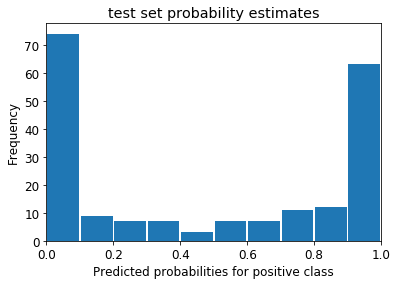

In [69]:
# store the predicted probabilities for class 1
y_pred_prob = lr.predict_proba(X_test)[:,1]

# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('test set probability estimates')
plt.xlabel('Predicted probabilities for positive class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

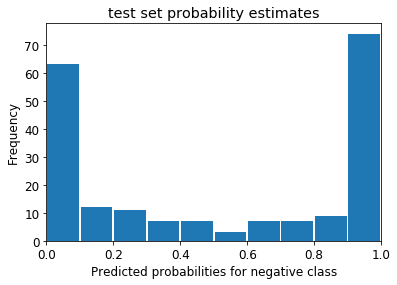

In [70]:
# store the predicted probabilities for class 0
y_pred_prob = lr.predict_proba(X_test)[:,0]

# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('test set probability estimates')
plt.xlabel('Predicted probabilities for negative class')
plt.ylabel('Frequency')

In [52]:
# histogram of the probability estimates on training set trained using Logistic regression classifier
# default parameters

Text(0, 0.5, 'Frequency')

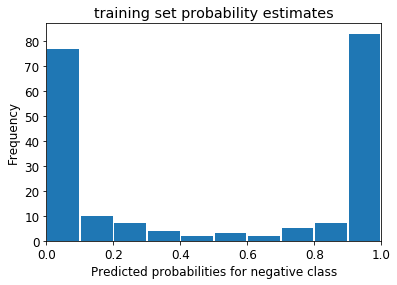

In [53]:
# for negative class
# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_training_neg, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('training set probability estimates')
plt.xlabel('Predicted probabilities for negative class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

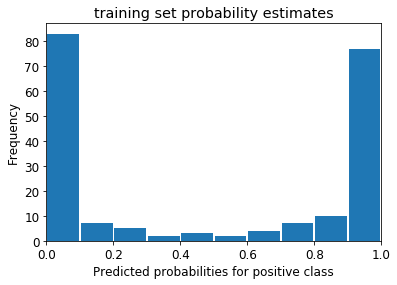

In [54]:
# for positive class
# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_training_pos, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('training set probability estimates')
plt.xlabel('Predicted probabilities for positive class')
plt.ylabel('Frequency')

In [90]:
# histogram of the probability estimates on training set trained using Logistic regression classifier
# best classifier from part (ii) 

Text(0, 0.5, 'Frequency')

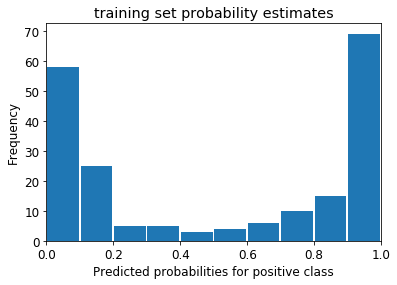

In [91]:
# for positive class
# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_training_pos_opt, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('training set probability estimates')
plt.xlabel('Predicted probabilities for positive class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

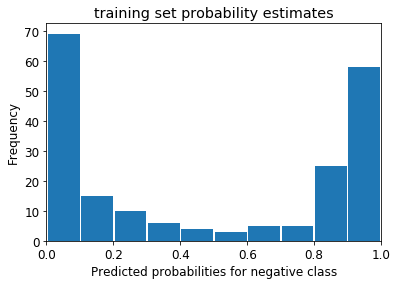

In [92]:
# for negative class
# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_training_neg_opt, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('training set probability estimates')
plt.xlabel('Predicted probabilities for negative class')
plt.ylabel('Frequency')

In [165]:
# According to the histograms above, we can see that for each positive and negative class, the number of 
# the probability estimates of the test set that is 1.0 and 0 is more than that of the training set when using the 
# best classifier from part (ii). The histogram of a good classifier over the positive class 
# would be concentrating towards 1, and the histogram for the negative class towards 0. the more the histograms 
# datas tend to the right and left side, the higher the accuracy of the model is. so the classifier perform on
# a test set is better.

In [93]:
# Q3 Naive Bayes

In [94]:
# i) 

In [119]:
import numpy as np
# the positive class: generated by a Gaussian distribution of mean equal to (0, 0) and unit standard deviation
pos_class = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 1000)
# the negative class is generated by a Gaussian distribution of mean equal to (5,5) and unit standard deviation
neg_class = np.random.multivariate_normal([5,5], [[1,0],[0,1]], 1000)

# label positive class as 1 and negative class as 0

positive_class = np.append(pos_class,np.ones((1000,1)),axis=1)

negative_class = np.append(neg_class,np.zeros((1000,1)),axis=1)

data_set = np.concatenate((positive_class, negative_class))


In [120]:
# ii) 

In [121]:
# Build a Gaussian Naive Bayes classifier on the above training set

In [122]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = data_set[:,0:2]
Y = data_set[:,2]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)




In [123]:
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
GaussNB.predict(X_test)

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0.

In [125]:
accuracy = GaussNB.score(X_test, y_test)

print('Gaussian Naive Bayes classifier Accuracy: ', accuracy)

Gaussian Naive Bayes classifier Accuracy:  0.998


In [126]:
# prediction
y_predicted=GaussNB.predict(X_test)
#evaluation
print('Percentage correct (accuracy) of Gaussian Naive Bayes: ', np.mean(y_test == y_predicted))

Percentage correct (accuracy) of Gaussian Naive Bayes:  0.998


In [127]:
from sklearn import metrics

print('Percentage correct (accuracy) of Gaussian Naive Bayes: ', metrics.accuracy_score(y_test, y_predicted))

Percentage correct (accuracy) of Gaussian Naive Bayes:  0.998


In [128]:
# Hyperparameter Optimization to obtain better performance using {'var_smoothing': 1.0} trained on training set
# from part i) Hyperparameter Optimization obtained below part ii) 

In [129]:
GaussNB = GaussianNB(priors=None, var_smoothing=1.0)
GaussNB.fit(X_train, y_train)

# prediction
y_predicted=GaussNB.predict(X_test)
#evaluation
print('(Hyperparameter Optimization) accuracy of Gaussian Naive Bayes on training set from part i): ', np.mean(y_test == y_predicted))

(Hyperparameter Optimization) accuracy of Gaussian Naive Bayes on training set from part i):  0.998


In [131]:
# store the predicted probabilities for class 1
y_pred_prob_gnb_pos = GaussNB.predict_proba(X_test)[:,1]

In [132]:
# store the predicted probabilities for class 0
y_pred_prob_gnb_neg = GaussNB.predict_proba(X_test)[:,0]

In [108]:
# Hyperparameter Optimization to obtain better performance
# hyperparameter optimization using GridSearchCV


In [109]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9,num=100)}

gs_NB = GridSearchCV(estimator=GaussNB, param_grid=params_NB, cv=cv_method, verbose=1, scoring='accuracy')

GaussNB_grid_result = gs_NB.fit(X_train, y_train)

print("Best: %f using %s" % (GaussNB_grid_result.best_score_, GaussNB_grid_result.best_params_))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 1.000000 using {'var_smoothing': 1.0}


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    1.4s finished


In [110]:
import pandas as pd
import altair as alt

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

alt.Chart(results_NB, 
          title='NB Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('var_smoothing', title='Var. Smoothing'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False))
).interactive()

alt.Chart(...)

In [111]:
# iii) 

In [112]:
# test set generated in the same way as the training set

In [113]:
import numpy as np
# the positive class: generated by a Gaussian distribution of mean equal to (0, 0) and unit standard deviation
test_pos_class = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 1000)
# the negative class is generated by a Gaussian distribution of mean equal to (5,5) and unit standard deviation
test_neg_class = np.random.multivariate_normal([5,5], [[1,0],[0,1]], 1000)

# label positive class as 1 and negative class as 0

test_positive_class = np.append(test_pos_class,np.ones((1000,1)),axis=1)

test_negative_class = np.append(test_neg_class,np.zeros((1000,1)),axis=1)

test_data_set = np.concatenate((test_positive_class, test_negative_class))

In [114]:
#  Hyperparameter Optimization to obtain better performance using {'var_smoothing': 1.0}

In [115]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_test = test_data_set[:,0:2]
Y_test = test_data_set[:,2]


X_train, X_test, y_train, y_test = train_test_split(X_test, Y_test, test_size=0.25)

GaussNB = GaussianNB(priors=None, var_smoothing=1.0)
GaussNB.fit(X_train, y_train)

# prediction
y_test_predicted=GaussNB.predict(X_test)
#evaluation
print('Percentage correct (accuracy) of Gaussian Naive Bayes on test set: ', np.mean(y_test == y_test_predicted))

Percentage correct (accuracy) of Gaussian Naive Bayes on test set:  1.0


In [116]:
# histogram of the probability estimates on test set trained using Gaussian Naive Bayes classifier
# best classifier from part (ii) 

Text(0, 0.5, 'Frequency')

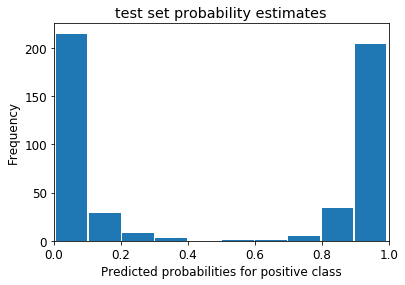

In [117]:
from matplotlib import pyplot as plt
%matplotlib inline

# store the predicted probabilities for class 1
y_pred_prob = GaussNB.predict_proba(X_test)[:,1]

# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('test set probability estimates')
plt.xlabel('Predicted probabilities for positive class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

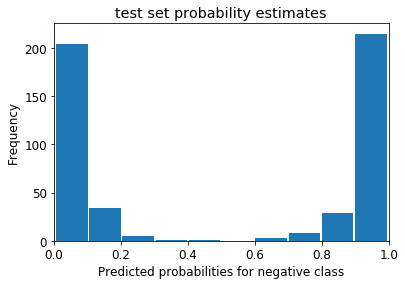

In [118]:
# store the predicted probabilities for class 0
y_pred_prob = GaussNB.predict_proba(X_test)[:,0]

# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('test set probability estimates')
plt.xlabel('Predicted probabilities for negative class')
plt.ylabel('Frequency')

In [133]:
# histogram of the probability estimates on training set trained using Gaussian Naive Bayes classifier
# best classifier from part (ii) 

Text(0, 0.5, 'Frequency')

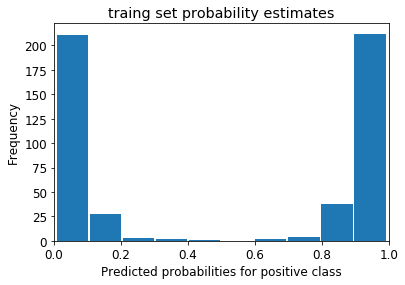

In [134]:

from matplotlib import pyplot as plt
%matplotlib inline



# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_gnb_pos, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('traing set probability estimates')
plt.xlabel('Predicted probabilities for positive class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

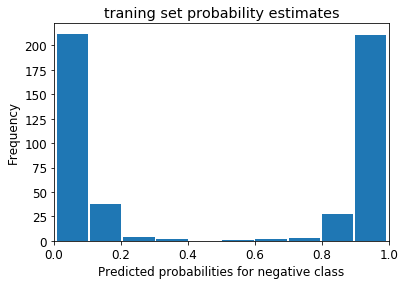

In [135]:
# adjust the front size
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

plt.hist(y_pred_prob_gnb_neg, bins=10, rwidth=0.95)

plt.xlim(0,1)

plt.title('traning set probability estimates')
plt.xlabel('Predicted probabilities for negative class')
plt.ylabel('Frequency')

In [166]:
# According to the histograms above, we can see that for each positive and negative class, the number of 
# the probability estimates of the test set that is 1.0 and 0 is more than that of the training set when using the 
# best classifier from part (ii). The histogram of a good classifier over the positive class 
# would be concentrating towards 1, and the histogram for the negative class towards 0. the more the histograms 
# datas tend to the right and left side, the higher the accuracy of the model is. so the classifier perform on
# a test set is better.

In [163]:
# iv) The data set is very simple and fully known. Can you provide 
# an intuitive explanation of the operation of the classifier?

In [164]:
# Naive Bayes is a statistical classification technique based on Bayes Theorem. 
# It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and 
# reliable algorithm.
# Naive Bayes classifiers have high accuracy and speed on large datasets.
# Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of 
# other features. 
# For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction 
# history,age, and location. Even if these features are interdependent, these features are still considered 
# independently. This assumption simplifies computation, and that's why it is considered as naive.
# This assumption is called class conditional independence.
# Naive Bayes classifier works in the following way:
# 1, Calculate Prior Probability for given class labels
# 2, calculate conditional Probability with each attribute for each class
# 3, multiply same class conditional Probability
# 4, multiply Prior Probability with step 3 Probability
# 5, see which class has higher Probability, higher Probability class belongs to given input set step.

In [136]:
# Q4 Unsupervised learning and the EM algorithm

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df_mouse = pd.read_csv("mouse.csv", comment='#', delim_whitespace=True, header=None)

df_mouse

,0,1,2
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head
...,...,...,...
495,0.151506,0.876586,Noise
496,0.860308,0.633833,Noise
497,0.862083,0.591805,Noise
498,0.916030,0.523391,Noise


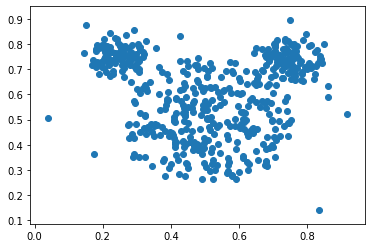

In [139]:
plt.scatter(df_mouse.iloc[:, 0], df_mouse.iloc[:, 1])

In [140]:
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [141]:
y_predicted = km.fit_predict(df_mouse[[0,1]])
y_predicted

array([1, 3, 2, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 2, 0, 1, 3, 1, 3, 1, 2, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3,
       3, 3, 0, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 0, 1, 0, 3, 1, 1, 3, 2, 0, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 0, 3, 1, 3, 3, 1, 1, 2, 1, 3, 3, 2, 1, 1, 3, 3,
       0, 1, 3, 1, 1, 3, 1, 0, 1, 2, 0, 1, 2, 3, 3, 0, 1, 3, 2, 1, 1, 3,
       2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 3, 0, 1, 1, 3, 1, 0, 1,
       1, 0, 1, 0, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 2, 0, 1, 0, 3, 1, 0,
       1, 1, 1, 2, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 3, 1, 3, 1,
       1, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 0,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 0, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 0,
       3, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [142]:
df_mouse['cluster'] = y_predicted
df_mouse

,0,1,2,cluster
0,0.456601,0.432806,Head,1
1,0.611378,0.528625,Head,3
2,0.450299,0.711606,Head,2
3,0.639015,0.460744,Head,3
4,0.628957,0.323470,Head,3
...,...,...,...,...
495,0.151506,0.876586,Noise,2
496,0.860308,0.633833,Noise,0
497,0.862083,0.591805,Noise,0
498,0.916030,0.523391,Noise,0


In [143]:
km.cluster_centers_

array([[0.71736278, 0.71115987],
       [0.42566065, 0.48563878],
       [0.26980791, 0.73962001],
       [0.62485302, 0.41024962]])

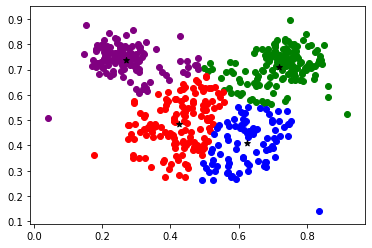

In [144]:
df1 = df_mouse[df_mouse.cluster==0]
df2 = df_mouse[df_mouse.cluster==1]
df3 = df_mouse[df_mouse.cluster==2]
df4 = df_mouse[df_mouse.cluster==3]

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], color='green')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], color='red')
plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], color='purple')
plt.scatter(df4.iloc[:, 0], df4.iloc[:, 1], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

In [145]:
k_range = range(1,13)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_mouse[[0,1]])
    sse.append(km.inertia_)

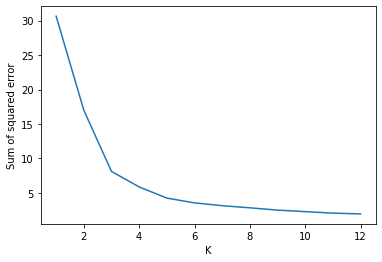

In [146]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [147]:
# scale data properly to beter clustering the data

In [148]:
import numpy as np

df_mouse = pd.read_csv("mouse.csv", comment='#', delim_whitespace=True, header=None)



x_1 = np.array(df_mouse.iloc[:, 0])
x_2 = np.array(df_mouse.iloc[:, 1])

x_1 = x_1.reshape(-1,1)
x_2 = x_2.reshape(-1,1)

scaler = MinMaxScaler()
x_1_scaler = scaler.fit_transform(x_1)
x_2_scaler = scaler.fit_transform(x_2)
x = np.append(x_1_scaler,x_2_scaler,axis=1)

km = KMeans(n_clusters=4)

y_pred = km.fit_predict(x)

y_pred



array([1, 3, 0, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 0, 3, 1, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 2, 1, 3, 1, 3, 3, 0, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 3,
       3, 3, 2, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 0, 2, 2, 1, 3, 3, 3, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1,
       3, 3, 1, 1, 1, 3, 2, 3, 1, 3, 3, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 3,
       2, 3, 3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 3, 3, 2, 3, 3, 0, 1, 3, 3,
       0, 1, 2, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3, 1, 2, 1,
       3, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3,
       3, 2, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2,
       1, 1, 1, 0, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2,
       1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2,
       2, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [149]:
df_mouse['cluster'] = y_pred

In [150]:
df_mouse

,0,1,2,cluster
0,0.456601,0.432806,Head,1
1,0.611378,0.528625,Head,3
2,0.450299,0.711606,Head,0
3,0.639015,0.460744,Head,3
4,0.628957,0.323470,Head,3
...,...,...,...,...
495,0.151506,0.876586,Noise,0
496,0.860308,0.633833,Noise,2
497,0.862083,0.591805,Noise,2
498,0.916030,0.523391,Noise,2


In [151]:
km.cluster_centers_

array([[0.2548187 , 0.79986118],
       [0.43504961, 0.51859736],
       [0.77833595, 0.75058802],
       [0.60799879, 0.33499756]])

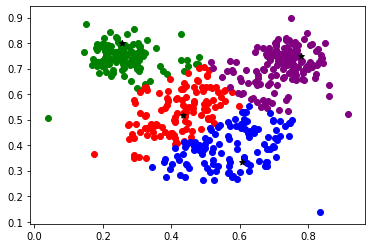

In [152]:
df1 = df_mouse[df_mouse.cluster==0]
df2 = df_mouse[df_mouse.cluster==1]
df3 = df_mouse[df_mouse.cluster==2]
df4 = df_mouse[df_mouse.cluster==3]

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], color='green')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], color='red')
plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], color='purple')
plt.scatter(df4.iloc[:, 0], df4.iloc[:, 1], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

In [153]:
df1

,0,1,2,cluster
2,0.450299,0.711606,Head,0
14,0.299533,0.623063,Head,0
32,0.366801,0.709811,Head,0
39,0.436428,0.692301,Head,0
62,0.323512,0.639350,Head,0
...,...,...,...,...
389,0.180972,0.781299,Ear_left,0
490,0.290950,0.855767,Noise,0
492,0.040555,0.507240,Noise,0
495,0.151506,0.876586,Noise,0


In [154]:
df_mouse

,0,1,2,cluster
0,0.456601,0.432806,Head,1
1,0.611378,0.528625,Head,3
2,0.450299,0.711606,Head,0
3,0.639015,0.460744,Head,3
4,0.628957,0.323470,Head,3
...,...,...,...,...
495,0.151506,0.876586,Noise,0
496,0.860308,0.633833,Noise,2
497,0.862083,0.591805,Noise,2
498,0.916030,0.523391,Noise,2


In [155]:
k_range = range(1,13)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

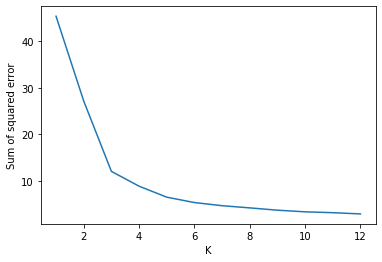

In [156]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [157]:
sse

[45.30619098840202,
 27.138601582619994,
 12.060078975393534,
 8.887843147189495,
 6.530375004609862,
 5.375386389885341,
 4.703092103770661,
 4.234553717506108,
 3.7386909689466945,
 3.389522438633912,
 3.2033782664966224,
 2.9408043004797477]

In [158]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from scipy.stats import mode
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
%matplotlib inline

In [159]:
df_mouse = pd.read_csv("mouse.csv", comment='#', delim_whitespace=True, header=None)
df_mouse.columns=['data1', 'data2', 'target']
Target = {'Head':0, 'Ear_left':1, 'Ear_right':2, 'Noise':3}
df_mouse.target = [Target[item] for item in df_mouse.target]
df_mouse

,data1,data2,target
0,0.456601,0.432806,0
1,0.611378,0.528625,0
2,0.450299,0.711606,0
3,0.639015,0.460744,0
4,0.628957,0.323470,0
...,...,...,...
495,0.151506,0.876586,3
496,0.860308,0.633833,3
497,0.862083,0.591805,3
498,0.916030,0.523391,3


accuracy on KMeans:  0.862
accuracy on EM:  0.966


Text(0.5, 1.0, 'EM Clusters')

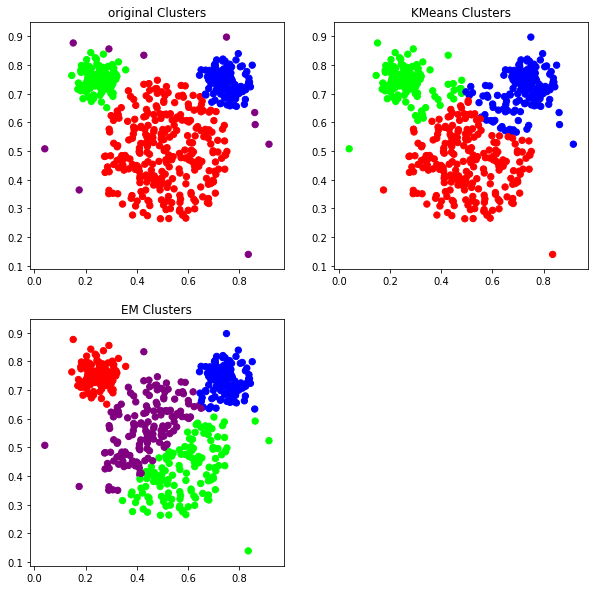

In [160]:


X = df_mouse.iloc[:, 0:2]
y = df_mouse.iloc[:, 2]

# Bulid the Kmeans Model
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(4):
    cat = (clusters==i)
    labels[cat] = mode(y[cat])[0]
acc = accuracy_score(df_mouse.target, labels)
print("accuracy on KMeans: ", acc)

plt.figure(figsize=(10,10))

colormap = np.array(['red', 'lime', 'blue', 'purple'])

# plot original model classifications
plt.subplot(2,2,1)
plt.scatter(X.data1, X.data2, c = colormap[df_mouse.target],s=40)
plt.title('original Clusters')

# plot KMeans model classifications
plt.subplot(2,2,2)
plt.scatter(X.data1, X.data2, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')

# Cluster the mouse dataset using the EM algorithm
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
xs = pd.DataFrame(scaled_X, columns=X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm_y = gmm.fit_predict(xs)
labels = np.zeros_like(clusters)

for i in range(4):
    cat = (gmm_y==i)
    labels[cat] = mode(y[cat])[0]

acc = accuracy_score(df_mouse.target, labels)
print("accuracy on EM: ", acc)

# plot EM model classifications
plt.subplot(2,2,3)
plt.scatter(X.data1, X.data2, c = colormap[gmm_y], s = 40)

plt.title('EM Clusters')



In [161]:
import numpy as np
from numpy.linalg import norm

#kmeans = KMeans(n_clusters=4)
class Kmeans:
    

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

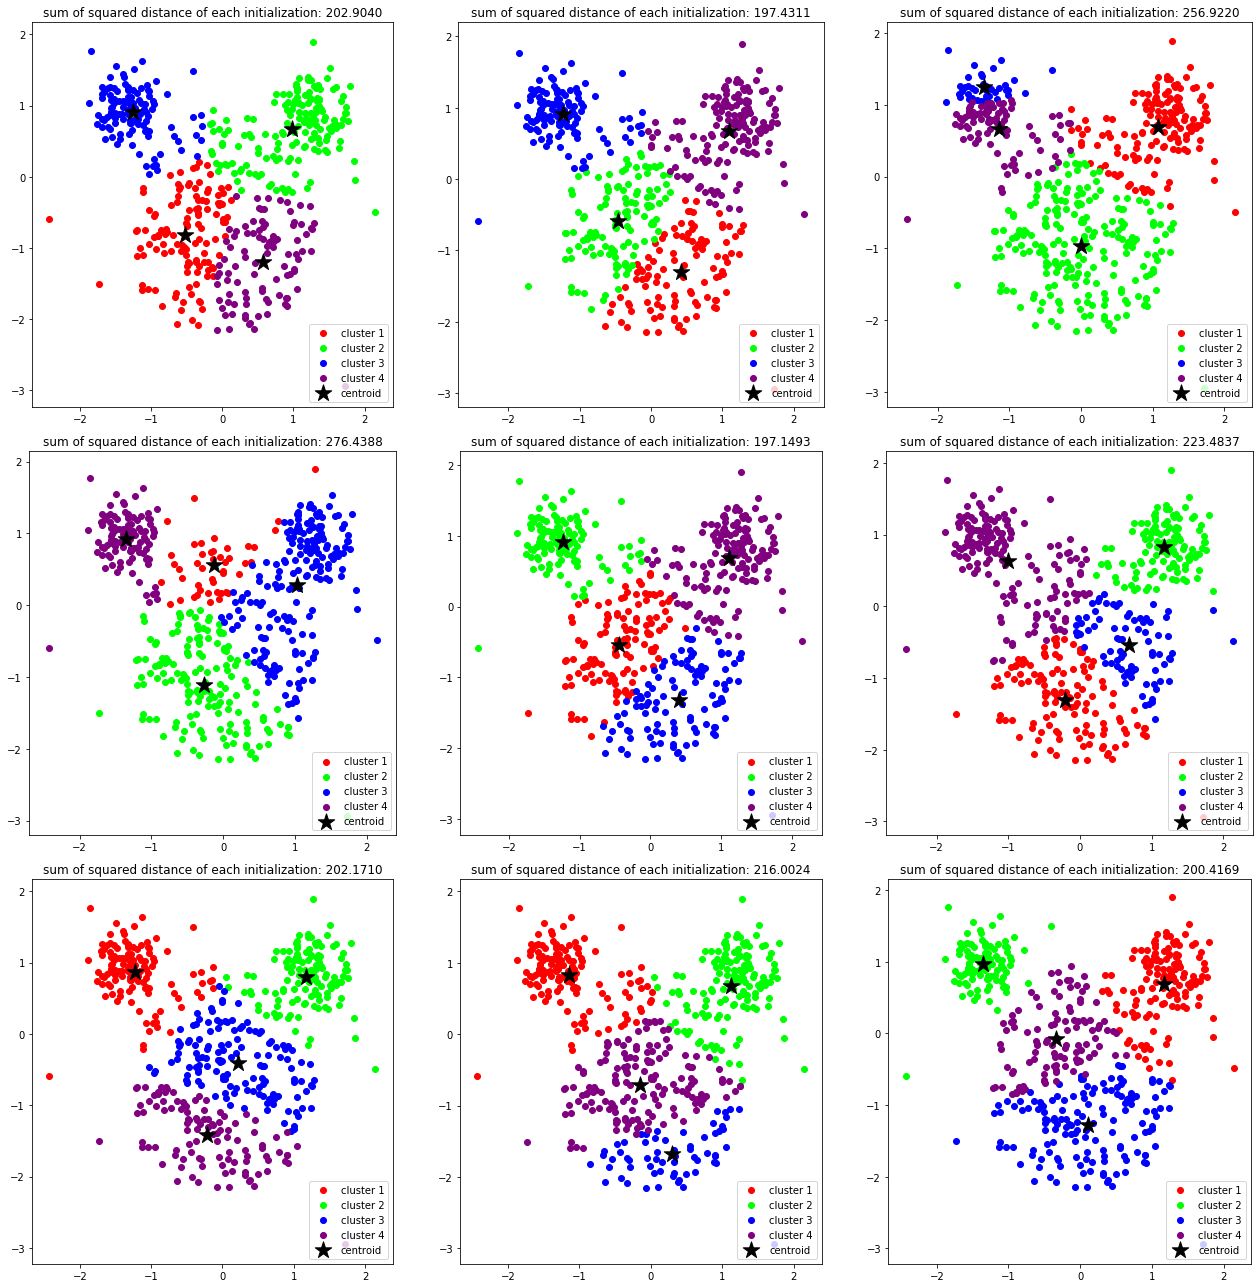

In [162]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    
    km = Kmeans(n_clusters=4, max_iter=3, random_state=np.random.randint(0, 100, size=1))
    km.fit(scaled_X)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(scaled_X[km.labels == 0, 0], scaled_X[km.labels == 0, 1],
                  c='red', label='cluster 1')
    ax[i].scatter(scaled_X[km.labels == 1, 0], scaled_X[km.labels == 1, 1],
                  c='lime', label='cluster 2')
    ax[i].scatter(scaled_X[km.labels == 2, 0], scaled_X[km.labels == 2, 1],
                  c='blue', label='cluster 3')
    ax[i].scatter(scaled_X[km.labels == 3, 0], scaled_X[km.labels == 3, 1],
                  c='purple', label='cluster 4')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='black', marker='*', s=300, label='centroid')
    #ax[i].set_xlim([-2, 2])
    #ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title("sum of squared distance of each initialization: "f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();
